In [829]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [830]:
bank = pd.read_csv("bank-additional-full.csv", sep=';')

In [831]:
#basic descriptive statistics
# higth sd in "balance", "duration", "campaign", "pdays" "previous" which indicates a fairly wide spread of data
bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [832]:
bank.groupby('y').mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
y                                                                          
no   39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
yes  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
y                                                           
no        93.603757     -40.593097   3.811491  5176.166600  
yes       93.354386     -39.789784   2.123135  5095.115991

SD bigger then mean(duration,campaign,previous,emp.var.rate,cons.conf.idx)- high variation between values, and abnormal distribution for data.  A smaller standard deviation indicates that more of the data is clustered about the mean while A larger once indicates the data are more spread out.

In [833]:
bank.head(100)

age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
..  ...          ...       ...                  ...      ...     ...  ...   
95   45     services   married  professional.course       no     yes   no   
96   42   management   married    university.degree       no      no   no   
97   53       admin.  divorced    university.degree  unknown      no   no   
98   37   technician    single  professional.course       no      no   no   
99   44  blue-collar   married             basic.6y       no      no   no   

      contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   telephone   may         mon  ...         1    999         0  nonexistent   
1   telephone   may         mon  ...         1    999         0  nonexistent   
2   telephone   may         mon  ...         1    999         0  nonexistent   
3   telephone   may         mon  ...         1    999         0  nonexistent   
4   telephone   may         mon  ...         1    999         0  nonexistent   
..        ...   ...         ...  ...       ...    ...       ...          ...   
95  telephone   may         mon  ...         1    999         0  nonexistent   
96  telephone   may         mon  ...         1    999         0  nonexistent   
97  telephone   may         mon  ...         1    999         0  nonexistent   
98  telephone   may         mon  ...         1    999         0  nonexistent   
99  telephone   may         mon  ...         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no  
..          ...             ...            ...        ...          ...  ..  
95          1.1          93.994          -36.4      4.857       5191.0  no  
96          1.1          93.994          -36.4      4.857       5191.0  no  
97          1.1          93.994          -36.4      4.857       5191.0  no  
98          1.1          93.994          -36.4      4.857       5191.0  no  
99          1.1          93.994          -36.4      4.857       5191.0  no  

[100 rows x 21 columns]

Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

https://archive.ics.uci.edu/ml/datasets/bank+marketing


Exploratory Data Analysis

In [834]:
bank.shape

(41188, 21)

In [835]:

bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [836]:
#Some times, we want to know what percentage of the whole is for each value that appears in the column. 
#To calculate this in pandas with the value_counts() method, set the argument normalize to True.
bank['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

That makes it highly unbalanced, the positive class of target variable for 11.26%

In [837]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [838]:
#Check the datatypes of the attributes.
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [839]:
#Are there any missing values in the dataset?
bank.isnull().values.any()

False

In [840]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [841]:
bank.isin([0]).any().any()

True

In [842]:
#How many o values in every attribute
#Knn cannot have 0 or Nan 

bank.isin([0]).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [843]:
#previous 35563 is "0" (35563/41188 no data in this attribute ,I will drop this attribute)
bank = bank.drop(['previous'], axis=1)

In [844]:
#Colculating the mean
duration_mean = bank['duration']
durationMean = duration_mean.mean()
durationMean

258.2850101971448

In [845]:
#replacing all 0 valeuse with mean of that column
bank = bank.replace(0, durationMean)

In [846]:
bank.isin([0]).any().any()

False

In [847]:
bank.isin([0]).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [848]:
#In the ‘pdays’ column, it is observed that 999 makes 96% of the values of the column. 
#from attribute information 999 means client was not previously contacted.
# I suggest to drop this column as there is not enough information for further analysis.

bank['pdays'].value_counts(normalize=True)

999.00000    0.963217
3.00000      0.010658
6.00000      0.010003
4.00000      0.002865
9.00000      0.001554
2.00000      0.001481
7.00000      0.001457
12.00000     0.001408
10.00000     0.001263
5.00000      0.001117
13.00000     0.000874
11.00000     0.000680
1.00000      0.000631
15.00000     0.000583
14.00000     0.000486
8.00000      0.000437
258.28501    0.000364
16.00000     0.000267
17.00000     0.000194
18.00000     0.000170
22.00000     0.000073
19.00000     0.000073
21.00000     0.000049
25.00000     0.000024
26.00000     0.000024
27.00000     0.000024
20.00000     0.000024
Name: pdays, dtype: float64

In [849]:
bank = bank.drop(['pdays'], axis=1)


In [850]:
#In the ‘poutcome’ column, it is observed that nonexistent + failure makes 96.6% of the values of the column. 
#from attribute information ‘poutcome’ is  outcome of the previous marketing campaign
# I will not drop this column as a success rate 3.3% might be interesting for further analysis.
bank['poutcome'].value_counts(normalize=True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

In [851]:
#campaign: number of contacts performed during this campaign and for this client
bank['campaign'].value_counts(normalize=True)

1     0.428329
2     0.256628
3     0.129674
4     0.064363
5     0.038822
6     0.023769
7     0.015271
8     0.009712
9     0.006871
10    0.005463
11    0.004297
12    0.003035
13    0.002234
14    0.001675
17    0.001408
16    0.001238
15    0.001238
18    0.000801
20    0.000728
19    0.000631
21    0.000583
22    0.000413
23    0.000388
24    0.000364
27    0.000267
29    0.000243
28    0.000194
26    0.000194
25    0.000194
31    0.000170
30    0.000170
35    0.000121
32    0.000097
33    0.000097
34    0.000073
42    0.000049
40    0.000049
43    0.000049
56    0.000024
39    0.000024
41    0.000024
37    0.000024
Name: campaign, dtype: float64

In [852]:
bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign     poutcome  emp.var.rate  \
0   may         mon     261.0         1  nonexistent           1.1   
1   may         mon     149.0         1  nonexistent           1.1   
2   may         mon     226.0         1  nonexistent           1.1   
3   may         mon     151.0         1  nonexistent           1.1   
4   may         mon     307.0         1  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [853]:
#Let's check for duplicates
bank.duplicated().any()

True

In [854]:
#this doesn't seem like the case of some customers randomly having similar details. 
#It looks like the data duplication happened while entering the data.
bank[bank.duplicated(keep = False)]

age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
20534   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
25217   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
28477   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
36951   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  duration  campaign     poutcome  \
1265   telephone   may         thu     124.0         1  nonexistent   
1266   telephone   may         thu     124.0         1  nonexistent   
12260  telephone   jul         thu      88.0         1  nonexistent   
12261  telephone   jul         thu      88.0         1  nonexistent   
14155   cellular   jul         mon     331.0         2  nonexistent   
14234   cellular   jul         mon     331.0         2  nonexistent   
16819   cellular   jul         thu      43.0         3  nonexistent   
16956   cellular   jul         thu      43.0         3  nonexistent   
18464   cellular   jul         thu     128.0         1  nonexistent   
18465   cellular   jul         thu     128.0         1  nonexistent   
20072   cellular   aug         mon      33.0         1  nonexistent   
20216   cellular   aug         mon      33.0         1  nonexistent   
20531   cellular   aug         tue     127.0         1  nonexistent   
20534   cellular   aug         tue     127.0         1  nonexistent   
25183   cellular   nov         tue     123.0         2  nonexistent   
25217   cellular   nov         tue     123.0         2  nonexistent   
28476   cellular   apr         tue     114.0         1  nonexistent   
28477   cellular   apr         tue     114.0         1  nonexistent   
32505   cellular   may         fri     348.0         4  nonexistent   
32516   cellular   may         fri     348.0         4  nonexistent   
36950   cellular   jul         thu     252.0         1  nonexistent   
36951   cellular   jul         thu     252.0         1  nonexistent   
38255  telephone   oct         tue     120.0         1  nonexistent   
38281  telephone   oct         tue     120.0         1  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
1265            1.1          93.994          -36.4      4.855       5191.0   
1266            1.1          93.994          -36.4      4.855       5191.0

In [855]:
#Let's remove these duplicate rows.
bank.drop_duplicates(inplace = True)


In [856]:
bank.shape

(41176, 19)

In [857]:
bank['default'].value_counts(normalize=True)

no         0.791165
unknown    0.208762
yes        0.000073
Name: default, dtype: float64

In [858]:
#cons.conf.idx
bank['cons.conf.idx'].value_counts()


-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

In [859]:
#Creatind Dataframe in Panda
df = pd.DataFrame(bank)
#print(df)

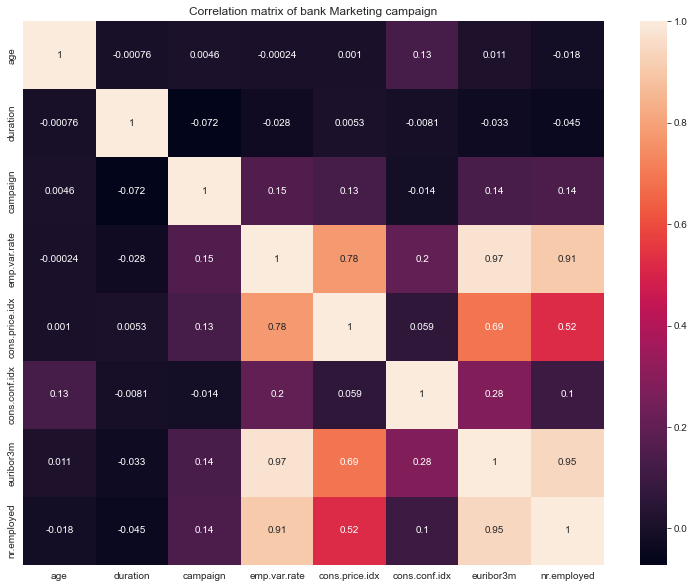

In [860]:
# taking all rows and 11 columns(without y)
plt.figure(figsize=(13, 10))
df_corr = bank.iloc[:,:18]
correlation_mat = df_corr.corr()
sns.heatmap(correlation_mat, annot = True);
plt.title("Correlation matrix of bank Marketing campaign")

#plt.xlabel("attributes")
#plt.ylabel("attributes")

plt.show()

The social and economic context attributes have correlation among themselves.
Number of employees rate is highly correlated with employee variation rate
Consumer price index is highly correlated with bank Euribor interest rates(euribor3m).
Employee variation rate also correlates with the Euribor interest rates

Outliers Treatment

In [861]:
#pip install cufflinks

In [862]:
#The temp object here is a pandas.series object which does not have a iplot method when not linked to plotly. 
#We need cufflinks to link plotly to pandas and add the iplot method:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

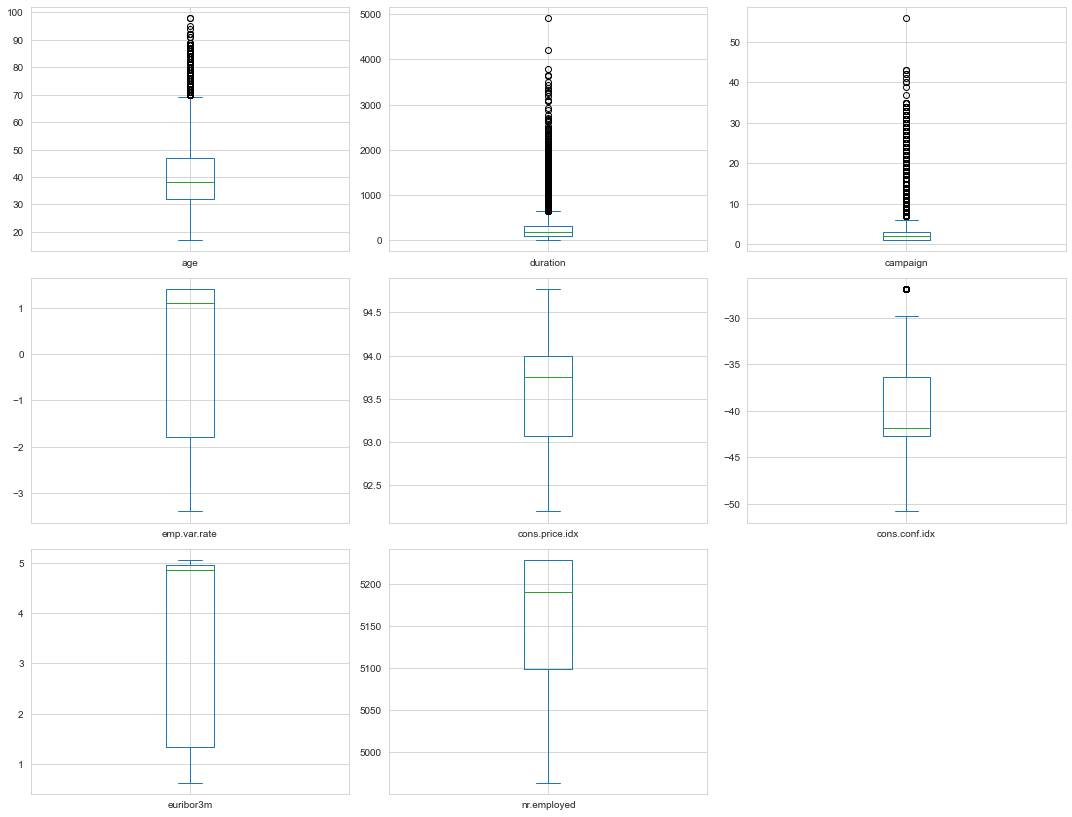

In [863]:
bank.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,15))
plt.tight_layout()

On the boxplot above looks like there is outliers Age it's appropriete for the attributes context (min 17, max 98), 
Duration(is a last contact to client in seconds max 4918 is 82 minutes for call- it's too long), 
and Compaign muximum looks very higth 56 call to same customer), so I will be removing only maximum and minimum valeuse.
  

In [864]:
min_duration, max_duration = bank.duration.quantile([0.01, 0.99])
min_duration, max_duration

(11.0, 1271.25)

In [865]:
bank[bank.duration < min_duration]

age          job  marital            education  default housing loan  \
278     47   technician   single             basic.9y       no      no   no   
288     60  blue-collar  married              unknown  unknown     yes   no   
1429    53       admin.  married    university.degree       no      no   no   
1481    45   management  married    university.degree       no     yes   no   
1500    33       admin.  married          high.school       no     yes  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
40939   27      student   single          high.school       no      no   no   
40944   52   technician  married    university.degree       no     yes   no   
40967   34      student   single  professional.course       no     yes   no   
40997   25      student  married          high.school       no     yes   no   
40998   34   technician  married    university.degree       no     yes   no   

         contact month day_of_week  duration  campaign     poutcome  \
278    telephone   may         mon      10.0         4  nonexistent   
288    telephone   may         mon       5.0         2  nonexistent   
1429   telephone   may         thu      10.0         7  nonexistent   
1481   telephone   may         thu       4.0         3  nonexistent   
1500   telephone   may         thu      10.0         2  nonexistent   
...          ...   ...         ...       ...       ...          ...   
40939  telephone   oct         tue       5.0         1  nonexistent   
40944  telephone   oct         wed       6.0         1      failure   
40967  telephone   oct         fri       6.0         1  nonexistent   
40997  telephone   oct         wed       7.0         1  nonexistent   
40998  telephone   oct         wed       5.0         1  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
278             1.1          93.994          -36.4      4.857       5191.0  no  
288             1.1          93.994          -36.4      4.857       5191.0  no  
1429            1.1          93.994          -36.4      4.855       5191.0  no  
1481            1.1          93.994          -36.4      4.855       5191.0  no  
1500            1.1          93.994          -36.4      4.855       5191.0  no  
...             ...             ...            ...        ...          ...  ..  
40939          -1.1          94.601          -49.5      0.982       4963.6  no  
40944          -1.1          94.601          -49.5      0.985       4963.6  no  
40967          -1.1          94.601          -49.5      0.993       4963.6  no  
40997          -1.1          94.601          -49.5      1.016       4963.6  no  
40998          -1.1          94.601          -49.5      1.016       4963.6  no  

[358 rows x 19 columns]

In [866]:
bank[bank.duration > max_duration]

age          job   marital            education  default  housing  \
37      52   technician   married             basic.9y       no      yes   
75      41  blue-collar  divorced             basic.4y  unknown      yes   
88      49   technician   married             basic.9y       no       no   
164     39     services  divorced          high.school  unknown       no   
446     42   technician   married  professional.course       no       no   
...    ...          ...       ...                  ...      ...      ...   
40764   36   technician   married    university.degree       no  unknown   
40836   30      student    single  professional.course       no      yes   
40838   32       admin.   married          high.school       no      yes   
41123   36  blue-collar    single             basic.6y       no       no   
41164   54       admin.   married  professional.course       no       no   

          loan    contact month day_of_week  duration  campaign     poutcome  \
37          no  telephone   may         mon    1666.0         1  nonexistent   
75          no  telephone   may         mon    1575.0         1  nonexistent   
88          no  telephone   may         mon    1467.0         1  nonexistent   
164         no  telephone   may         mon    2033.0         1  nonexistent   
446         no  telephone   may         tue    1623.0         1  nonexistent   
...        ...        ...   ...         ...       ...       ...          ...   
40764  unknown   cellular   sep         thu    1334.0         2  nonexistent   
40836       no   cellular   sep         mon    1616.0         4      success   
40838       no   cellular   sep         mon    1298.0         1  nonexistent   
41123       no   cellular   nov         tue    1556.0         4  nonexistent   
41164       no   cellular   nov         tue    1868.0         2      success   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
37              1.1          93.994          -36.4      4.857       5191.0   
75              1.1          93.994          -36.4      4.857       5191.0   
88              1.1          93.994          -36.4      4.857       5191.0   
164             1.1          93.994          -36.4      4.857       5191.0   
446             1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
40764          -1.1          94.199          -37.5      0.879       4963.6   
40836          -1.1          94.199          -37.5      0.879       4963.6   
40838          -1.1          94.199          -37.5      0.879       4963.6   
41123          -1.1          94.767          -50.8      1.046       4963.6   
41164          -1.1          94.767          -50.8      1.035       4963.6   

         y  
37      no  
75     yes  
88     yes  
164     no  
446    yes  
...    ...  
40764  yes  
40836   no  
40838  yes  
41123  yes  
41164  yes  

[412 rows x 19 columns]

In [867]:
bank1 = bank[(bank.duration<max_duration)&(bank.duration>min_duration)]
bank1.shape

(40325, 19)

In [868]:
bank1.describe()

age      duration      campaign  emp.var.rate  cons.price.idx  \
count  40325.000000  40325.000000  40325.000000  40325.000000    40325.000000   
mean      40.040645    246.696048      2.530440      0.086281       93.574891   
std       10.428557    212.643425      2.705138      1.571576        0.578400   
min       17.000000     12.000000      1.000000     -3.400000       92.201000   
25%       32.000000    104.000000      1.000000     -1.800000       93.075000   
50%       38.000000    180.000000      2.000000      1.100000       93.749000   
75%       47.000000    315.000000      3.000000      1.400000       93.994000   
max       98.000000   1271.000000     56.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   40325.000000  40325.000000  40325.000000  
mean      -40.476955      3.628744   5167.361880  
std         4.632636      1.731627     71.943497  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

In [869]:
min_campaign, max_campaign = bank.campaign.quantile([0.01, 0.99])
min_campaign, max_campaign

(1.0, 14.0)

In [870]:
bank[bank.campaign < min_campaign]


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

In [871]:
bank[bank.campaign > max_campaign]

age            job   marital          education default  housing  \
2631    48     technician    single            unknown      no  unknown   
2981    48       services   married        high.school      no       no   
3219    39    blue-collar   married           basic.9y      no       no   
3370    31         admin.    single        high.school      no       no   
3413    32         admin.  divorced        high.school      no      yes   
...    ...            ...       ...                ...     ...      ...   
34266   30       services    single        high.school      no  unknown   
34509   50       services  divorced        high.school      no      yes   
35272   32         admin.    single        high.school      no       no   
36884   56  self-employed   married  university.degree      no      yes   
40529   72        retired  divorced  university.degree      no       no   

          loan    contact month day_of_week  duration  campaign     poutcome  \
2631   unknown  telephone   may         tue      69.0        19  nonexistent   
2981        no  telephone   may         wed      17.0        18  nonexistent   
3219        no  telephone   may         thu     651.0        23  nonexistent   
3370        no  telephone   may         thu     132.0        22  nonexistent   
3413        no  telephone   may         thu     241.0        23  nonexistent   
...        ...        ...   ...         ...       ...       ...          ...   
34266  unknown   cellular   may         thu      11.0        15      failure   
34509       no   cellular   may         thu     199.0        15  nonexistent   
35272      yes   cellular   may         fri     284.0        15  nonexistent   
36884       no  telephone   jun         thu     390.0        15  nonexistent   
40529       no   cellular   aug         mon     220.0        16      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
2631            1.1          93.994          -36.4      4.856       5191.0   
2981            1.1          93.994          -36.4      4.859       5191.0   
3219            1.1          93.994          -36.4      4.860       5191.0   
3370            1.1          93.994          -36.4      4.860       5191.0   
3413            1.1          93.994          -36.4      4.860       5191.0   
...             ...             ...            ...        ...          ...   
34266          -1.8          92.893          -46.2      1.266       5099.1   
34509          -1.8          92.893          -46.2      1.266       5099.1   
35272          -1.8          92.893          -46.2      1.250       5099.1   
36884          -2.9          92.963          -40.8      1.235       5076.2   
40529          -1.7          94.027          -38.3      0.891       4991.6   

         y  
2631    no  
2981    no  
3219   yes  
3370    no  
3413    no  
...    ...  
34266   no  
34509   no  
35272   no  
36884   no  
40529   no  

[406 rows x 19 columns]

In [872]:
bank1 = bank[(bank.campaign<max_campaign)]
bank1.shape

(40701, 19)

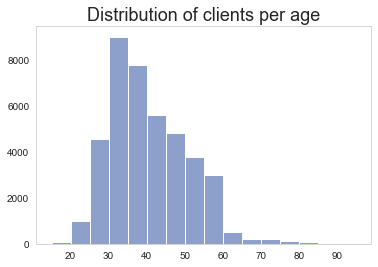

In [873]:
#Let's see the distribution of clients per age.
base_color = sns.color_palette('Set2')[2]

age_bins = np.arange(15, 100, 5)
plt.hist(data = bank1, x = 'age', bins = age_bins, color = base_color);
plt.title("Distribution of clients per age", fontsize=18)
plt.grid();

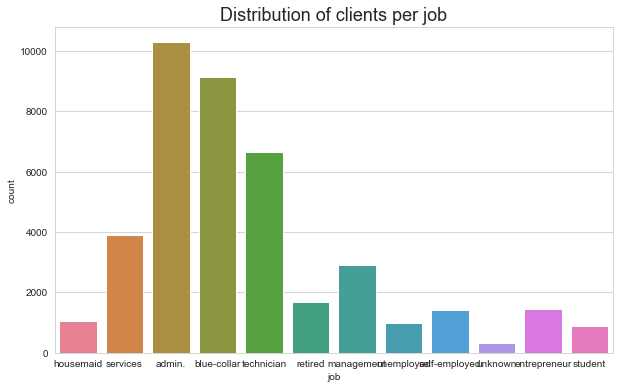

In [874]:
#Let's see the distribution of clients per job.
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per job", fontsize=18)
sns.countplot(x="job", data=bank1, palette='husl');

In [875]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=bank1["job"], columns=bank1["y"])


y                no   yes
job                      
admin.         8940  1349
blue-collar    8514   636
entrepreneur   1314   124
housemaid       940   106
management     2567   328
retired        1261   433
self-employed  1258   148
services       3595   323
student         598   275
technician     5937   729
unemployed      857   144
unknown         289    36

In [876]:
# Get names of indexes for which column job has value unknown
indexNames = bank1[ bank1['job'] == "unknown"].index



In [877]:
# Delete these row indexes from dataFrame
bank1.drop(indexNames , inplace=True)


In [878]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=bank1["job"], columns=bank1["y"])


y                no   yes
job                      
admin.         8940  1349
blue-collar    8514   636
entrepreneur   1314   124
housemaid       940   106
management     2567   328
retired        1261   433
self-employed  1258   148
services       3595   323
student         598   275
technician     5937   729
unemployed      857   144

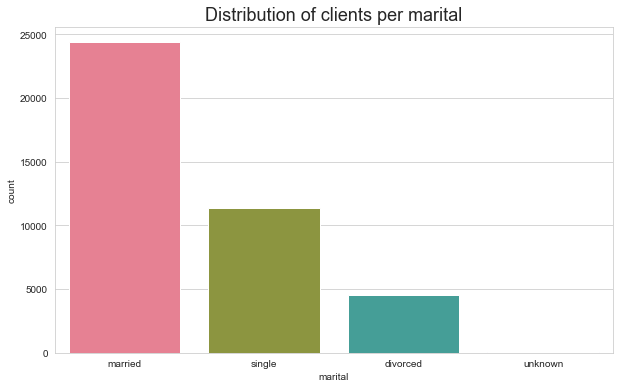

In [879]:
#Let's see the distribution of clients per job.
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per marital", fontsize=18)
sns.countplot(x="marital", data=bank1, palette='husl');

In [880]:
#Crosstab to display merital stats with respect to y  class variable
pd.crosstab(index=bank1["marital"], columns=bank1["y"])

y            no   yes
marital              
divorced   4072   473
married   21884  2510
single     9765  1603
unknown      60     9

In [881]:
# Get names of indexes for which column job has value unknown
indexMarital = bank1[ bank1['marital'] == "unknown"].index

In [882]:
# Delete these row indexes from dataFrame
bank1.drop(indexMarital , inplace=True)


In [883]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=bank1["marital"], columns=bank1["y"])

y            no   yes
marital              
divorced   4072   473
married   21884  2510
single     9765  1603

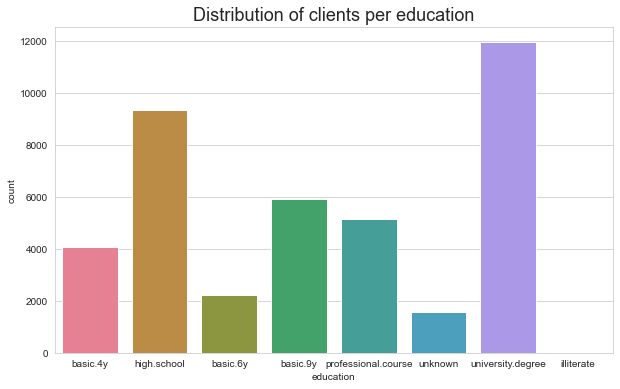

In [884]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per education", fontsize=18)
sns.countplot(x="education", data=bank1, palette='husl');

In [885]:
#Crosstab to display education stats with respect to y  class variable
pd.crosstab(index=bank1["education"], columns=bank1["y"])

y                       no   yes
education                       
basic.4y              3635   422
basic.6y              2056   187
basic.9y              5462   469
high.school           8320  1027
illiterate              14     4
professional.course   4572   594
university.degree    10317  1649
unknown               1345   234

In [886]:
# Get names of indexes for which column education has value unknown and illiterate
indexEducation = bank1[ bank1['education'] == "illiterate"].index
indexEducation2 = bank1[ bank1['education'] == "unknown"].index

In [887]:
# Delete these row indexes from dataFrame
bank1.drop(indexEducation , inplace=True)
bank1.drop(indexEducation2 , inplace=True)

In [888]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=bank1["education"], columns=bank1["y"])

y                       no   yes
education                       
basic.4y              3635   422
basic.6y              2056   187
basic.9y              5462   469
high.school           8320  1027
professional.course   4572   594
university.degree    10317  1649

In [889]:
#default: has credit in default? (categorical: 'no','yes','unknown')
bank1['default'].iplot(kind='hist',bins=25)

In [890]:
bank1['housing'].iplot(kind='hist',bins=25)

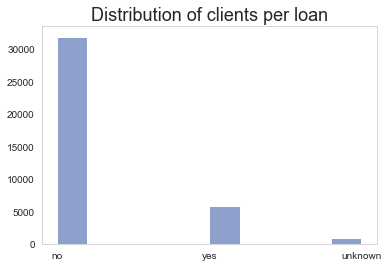

In [891]:
base_color = sns.color_palette('Set2')[2]
plt.hist(data = bank1, x = 'loan', color = base_color);
plt.title("Distribution of clients per loan", fontsize=18)
plt.grid();

In [892]:
# Get names of indexes for which column job has value unknown
indexloan = bank1[ bank1['loan'] == "unknown"].index

In [893]:
# Delete these row indexes from dataFrame
bank1.drop(indexloan , inplace=True)

In [894]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=bank1["loan"], columns=bank1["y"])

y        no   yes
loan             
no    28277  3608
yes    5251   638

Clients that had no loan had more chence to suscribed to term deposite

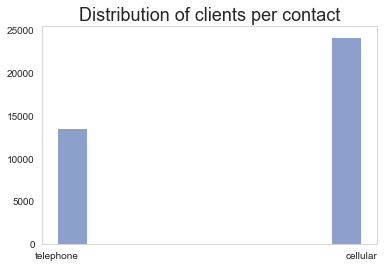

In [895]:
base_color = sns.color_palette('Set2')[2]
plt.hist(data = bank1, x = 'contact', color = base_color);
plt.title("Distribution of clients per contact", fontsize=18)
plt.grid();


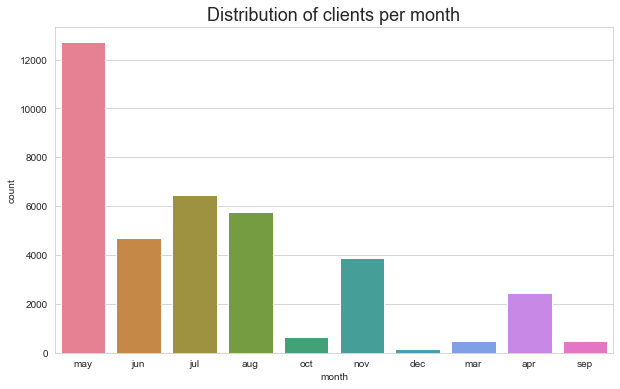

In [896]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per month", fontsize=18)
sns.countplot(x="month", data=bank1, palette='husl');

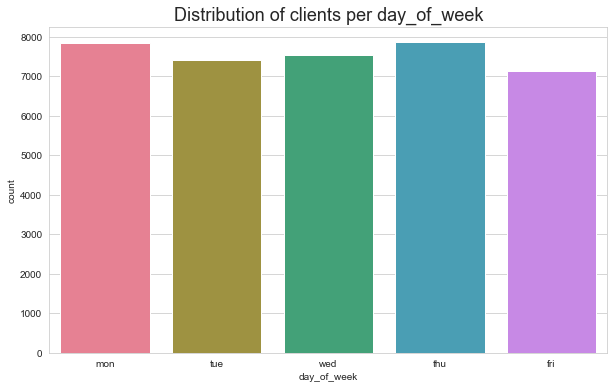

In [897]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per day_of_week", fontsize=18)
sns.countplot(x="day_of_week", data=bank1, palette='husl');

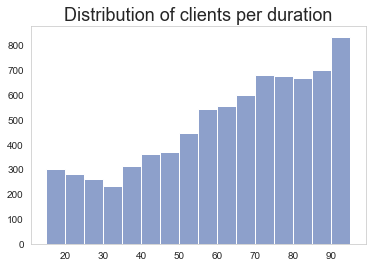

In [898]:
base_color = sns.color_palette('Set2')[2]

duration_bins = np.arange(15, 100, 5)
plt.hist(data = bank1, x = 'duration', bins = duration_bins, color = base_color);
plt.title("Distribution of clients per duration", fontsize=18)
plt.grid();

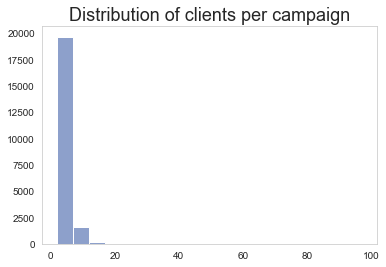

In [899]:
base_color = sns.color_palette('Set2')[2]

campaign_bins = np.arange(2, 100, 5)
plt.hist(data = bank1, x = 'campaign', bins = campaign_bins, color = base_color);
plt.title("Distribution of clients per campaign", fontsize=18)
plt.grid();

<AxesSubplot:title={'center':'Deposit value counts'}>

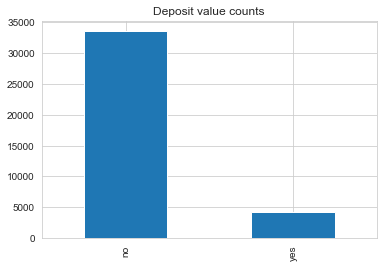

In [900]:
value_counts = bank1['y'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

Visualize the relationship between feature category vs dependent variable y

<AxesSubplot:title={'center':'Month and deposit'}>

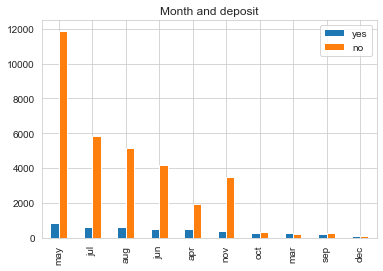

In [901]:
#Month and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank1[bank1['y'] == 'yes']['month'].value_counts()
j_bank['no'] = bank1[bank1['y'] == 'no']['month'].value_counts()

j_bank.plot.bar(title = 'Month and deposit')

In [902]:
#Crosstab to display Month stats with respect to y  class variable
pd.crosstab(index=bank1["month"], columns=bank1["y"])

y         no  yes
month            
apr     1946  484
aug     5170  594
dec       84   77
jul     5852  595
jun     4201  510
mar      243  252
may    11884  828
nov     3510  384
oct      361  297
sep      277  225

Most of the deposist made during May followed by  August , July and June 

<AxesSubplot:title={'center':'Job and deposit'}>

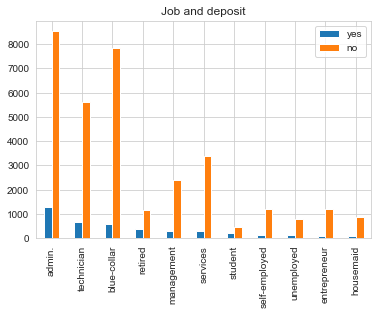

In [903]:
#job and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank1[bank1['y'] == 'yes']['job'].value_counts()
j_bank['no'] = bank1[bank1['y'] == 'no']['job'].value_counts()

j_bank.plot.bar(title = 'Job and deposit')

In [904]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=bank1["job"], columns=bank1["y"])

y                no   yes
job                      
admin.         8531  1280
blue-collar    7860   593
entrepreneur   1227   115
housemaid       875    98
management     2396   304
retired        1163   387
self-employed  1187   144
services       3372   297
student         479   208
technician     5626   682
unemployed      812   138

Customers who worked in administrative position  followed by technicians and blue collar  made deposits

<AxesSubplot:title={'center':'Marital status and deposit'}>

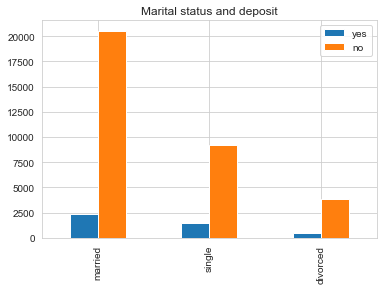

In [905]:
#marital status and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank1[bank1['y'] == 'yes']['marital'].value_counts()
j_bank['no'] = bank1[bank1['y'] == 'no']['marital'].value_counts()

j_bank.plot.bar(title = 'Marital status and deposit')

In [906]:
#Crosstab to display marital stats with respect to y  class variable
pd.crosstab(index=bank1["marital"], columns=bank1["y"])

y            no   yes
marital              
divorced   3805   447
married   20552  2332
single     9171  1467

Married customers  followed by single have made high deposits

<AxesSubplot:title={'center':'Type of contact and deposit'}>

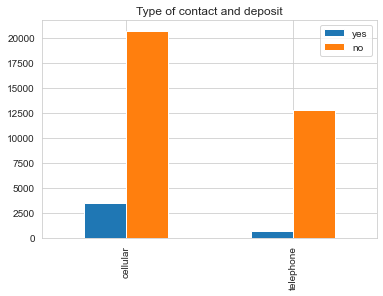

In [907]:
#type of contact and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank1[bank1['y'] == 'yes']['contact'].value_counts()
j_bank['no'] = bank1[bank1['y'] == 'no']['contact'].value_counts()

j_bank.plot.bar(title = 'Type of contact and deposit')

In [908]:
#Crosstab to display education stats with respect to y  class variable
pd.crosstab(index=bank1["contact"], columns=bank1["y"])

y             no   yes
contact               
cellular   20702  3530
telephone  12826   716

Customers  who were reached by cellular made high deposits

<AxesSubplot:title={'center':'Type of education and deposit'}>

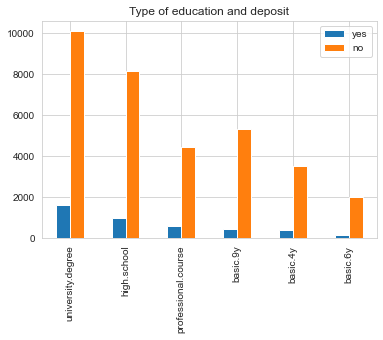

In [909]:
#type of education and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank1[bank1['y'] == 'yes']['education'].value_counts()
j_bank['no'] = bank1[bank1['y'] == 'no']['education'].value_counts()

j_bank.plot.bar(title = 'Type of education and deposit')

In [910]:
#Crosstab to display education stats with respect to y  class variable
pd.crosstab(index=bank1["education"], columns=bank1["y"])

y                       no   yes
education                       
basic.4y              3531   411
basic.6y              2003   180
basic.9y              5326   456
high.school           8125  1006
professional.course   4465   578
university.degree    10078  1615

Customers who had university degree followed by highschool had higher probability in making a deposit.

<AxesSubplot:title={'center':'Type of housing and deposit'}>

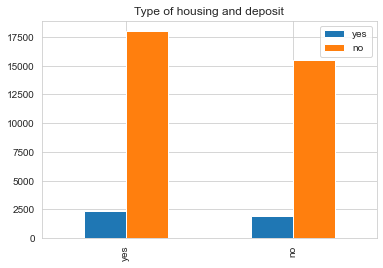

In [911]:
#type of housing and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank1[bank1['y'] == 'yes']['housing'].value_counts()
j_bank['no'] = bank1[bank1['y'] == 'no']['housing'].value_counts()

j_bank.plot.bar(title = 'Type of housing and deposit')

In [912]:
#Crosstab to display housing stats with respect to y  class variable
pd.crosstab(index=bank1["housing"], columns=bank1["y"])

y           no   yes
housing             
no       15520  1901
yes      18008  2345

Customers who had house had higher probability in making a deposit.

<AxesSubplot:title={'center':'Type of loan and deposit'}>

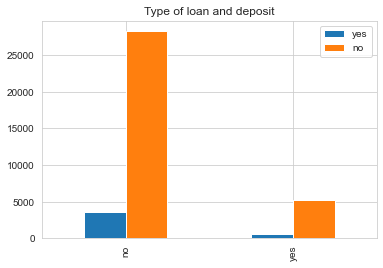

In [913]:
#type of loan and deposit
j_bank = pd.DataFrame()


j_bank['yes'] = bank1[bank1['y'] == 'yes']['loan'].value_counts()
j_bank['no'] = bank1[bank1['y'] == 'no']['loan'].value_counts()

j_bank.plot.bar(title = 'Type of loan and deposit')

In [914]:
#Crosstab to display loan stats with respect to y  class variable
pd.crosstab(index=bank1["loan"], columns=bank1["y"])

y        no   yes
loan             
no    28277  3608
yes    5251   638

Customers who had No loan had higher probability  make a deposit.

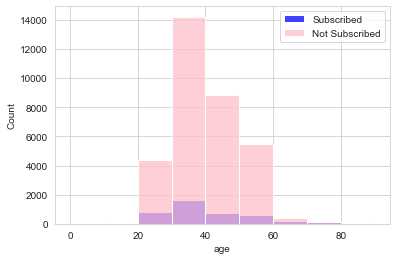

In [915]:
#type of age and deposit
bins = range(0, 100, 10)
ax = sns.histplot(bank1.age[bank1.y=='yes'],
              color='blue', kde=False, bins=bins, label='Subscribed')
sns.histplot(bank1.age[bank1.y=='no'],
         ax=ax,  # Overplots on first plot
         color='pink', kde=False, bins=bins, label="Not Subscribed")
plt.legend()
plt.show()

Customers who in (30-40) followed by (20-30)
and (40-50) had higher percentage of subscription to deposit account

In [916]:
fig = px.scatter(bank1, x="campaign", y="duration", color="y")
fig.show()

campaign: number of contacts performed during this campaign and for this client

Duration: last contact duration, in seconds
    
The longer was conversation with client , the more likly he made deposit
As more as employees contacted customers the less likely they  made deposit

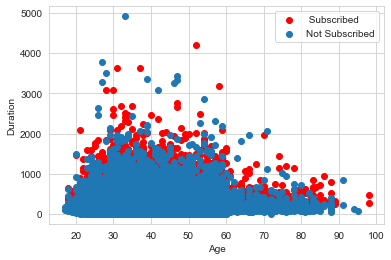

In [917]:
plt.scatter(x=bank1.age[bank1.y=='yes'], y=bank1.duration[(bank1.y=='yes')], c="red")
plt.scatter(x=bank1.age[bank1.y=='no'], y=bank1.duration[(bank1.y=='no')])
plt.legend([" Subscribed", "Not Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

In [918]:
import plotly.express as px

fig = px.box(bank1, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive")
fig.show()

The longer conversation with clients , the more likly they made deposit.

Comparing the median, the blue collar, entrepreneur and services had high duration of calls

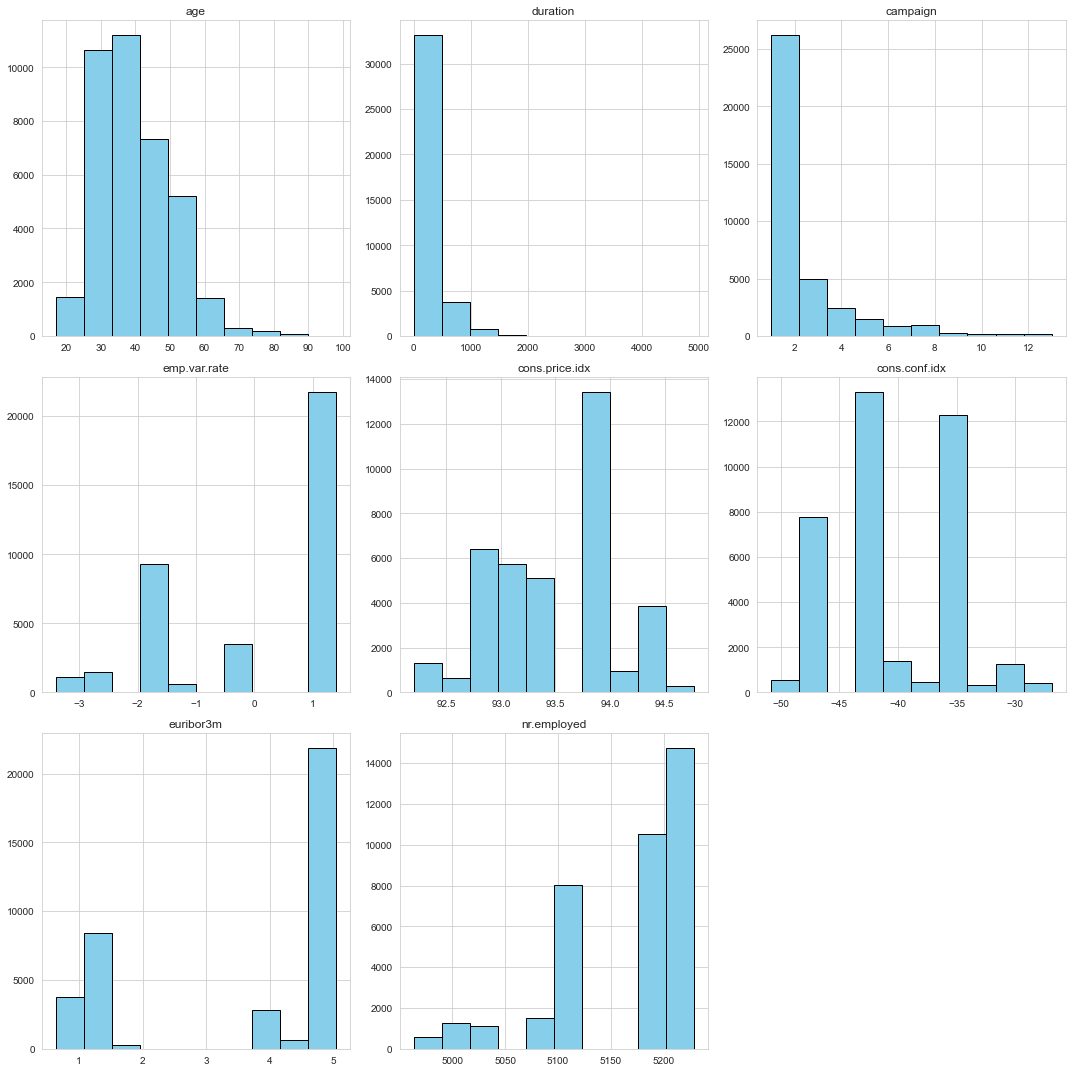

In [919]:
#Histogram for the numerical attributes
bank1.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

Categorical Treatment

In [920]:
#The dataset contains object type variables. Using sklearn's preprocessing tool I will encode all  variables to numerical labels.
from sklearn.preprocessing import LabelEncoder

In [921]:
#build a new dataframe containing only the object columns.
obj_bank = bank1.select_dtypes(include=['object']).copy()
obj_bank.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

In [922]:
bank1["month"].value_counts()


may    12712
jul     6447
aug     5764
jun     4711
nov     3894
apr     2430
oct      658
sep      502
mar      495
dec      161
Name: month, dtype: int64

In [794]:
#bank.replace([np.inf, -np.inf], np.nan, inplace=True)

In [795]:
#bank.dropna(how='all')

In [923]:
bank1.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign     poutcome  emp.var.rate  \
0   may         mon     261.0         1  nonexistent           1.1   
1   may         mon     149.0         1  nonexistent           1.1   
2   may         mon     226.0         1  nonexistent           1.1   
3   may         mon     151.0         1  nonexistent           1.1   
4   may         mon     307.0         1  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [924]:
bank1["day_of_week"].value_counts()

thu    7860
mon    7851
wed    7532
tue    7412
fri    7119
Name: day_of_week, dtype: int64

In [925]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank1['month']= bank1['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank1['day_of_week']= bank1['day_of_week'].map(day_dict)
bank1.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   month  day_of_week  duration  campaign     poutcome  emp.var.rate  \
0      5            2     261.0         1  nonexistent           1.1   
1      5            2     149.0         1  nonexistent           1.1   
2      5            2     226.0         1  nonexistent           1.1   
3      5            2     151.0         1  nonexistent           1.1   
4      5            2     307.0         1  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [926]:
dict={'yes':2,'no':1,'unknown':0}
bank1['housing']=bank1['housing'].map(dict)
bank1['default']=bank1['default'].map(dict)
bank1['loan']=bank1['loan'].map(dict)

In [927]:
bank1.head()

age        job  marital    education  default  housing  loan    contact  \
0   56  housemaid  married     basic.4y        1        1     1  telephone   
1   57   services  married  high.school        0        1     1  telephone   
2   37   services  married  high.school        1        2     1  telephone   
3   40     admin.  married     basic.6y        1        1     1  telephone   
4   56   services  married  high.school        1        1     2  telephone   

   month  day_of_week  duration  campaign     poutcome  emp.var.rate  \
0      5            2     261.0         1  nonexistent           1.1   
1      5            2     149.0         1  nonexistent           1.1   
2      5            2     226.0         1  nonexistent           1.1   
3      5            2     151.0         1  nonexistent           1.1   
4      5            2     307.0         1  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [929]:
#Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) 
#to each class of data. This may lead to the generation of priority issues in the training of data sets.
#A label with a high value may be considered to have high priority than a label having a lower value.
#SMOTE not supported between instances of 'float' and 'str' so we need to code y to 2 and 1

LabEn=LabelEncoder()

categorical_var=['job','marital', 'education','contact', 'poutcome']
for i in categorical_var:
    bank1[i]=LabEn.fit_transform(bank1[i])
    
bank1.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        1        1     1        1      5   
1   57    7        1          3        0        1     1        1      5   
2   37    7        1          3        1        2     1        1      5   
3   40    0        1          1        1        1     1        1      5   
4   56    7        1          3        1        1     2        1      5   

   day_of_week  duration  campaign  poutcome  emp.var.rate  cons.price.idx  \
0            2     261.0         1         1           1.1          93.994   
1            2     149.0         1         1           1.1          93.994   
2            2     226.0         1         1           1.1          93.994   
3            2     151.0         1         1           1.1          93.994   
4            2     307.0         1         1           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no  
4          -36.4      4.857       5191.0  no

In [930]:
#Checking if I didn't get any NaN valeuse when new lebels was created
bank1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Divide the dataset to training and test sets.

I would divide the data set into 2 portions in the ratio of 70:30
My target variable is ‘y’ which I have not included in  training and test data sets.

In [803]:
from sklearn.model_selection import train_test_split

In [931]:
X = bank1.drop("y",axis=1)
y = bank1["y"]

In [932]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [933]:
#!pip install SMOTE

In [934]:
#!pip install imblearn

In [935]:
from imblearn.over_sampling import SMOTE

In [936]:
oversample = SMOTE()

In [937]:
X,y = oversample.fit_resample(X,y)

In [938]:
from collections import Counter

In [939]:
print(Counter(y))

Counter({'no': 33528, 'yes': 33528})


In [940]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [943]:
y_train.isna().sum()

0

In [944]:
y_test.isna().sum()

0

In [945]:
y_test.isin([0]).any().any()

False

In [946]:
y_train.isin([0]).any().any()

False

In [941]:
print(Counter(y_train))

Counter({'yes': 23516, 'no': 23423})


In [947]:
print(Counter(y_test))

Counter({'no': 10105, 'yes': 10012})


In [948]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  int64  
 12  poutcome        41176 non-null  object 
 13  emp.var.rate    41176 non-null  float64
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr.employed     41176 non-null 

In [949]:
# We have negative valeuse so  Univariate Selection technique cannot be used for Feature Selection
#Decision tree technique and RFE can be used for feature selection


https://scikit-learn.org/stable/modules/preprocessing.html
https://medium.com/@sjacks/feature-transformation-21282d1a3215
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html?highlight=box%20cox

Feature Transformation-Power Transformer-Helps correct skewness-0 mean & unit variance-No predetermined range

Yeo-Johnson or Box-Cox

Box-Cox can only be used on non-negative data


In [950]:
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot


In [951]:
#standardization does not change the shape of the distribution in nature but log transformation does.
#Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive.
#It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

# power transform the raw data
pt = PowerTransformer(method='yeo-johnson',standardize=True)
X_train = pt.fit_transform(X_train)


In [952]:
X_test = pt.fit_transform(X_test)

In [953]:
# convert the array back to a dataframe
X_train = DataFrame(X_train)
X_train.head()

0         1         2         3         4         5         6   \
0 -1.056827  1.044633 -0.165449 -0.165700  0.465189 -0.881886 -0.332350   
1 -0.291297  1.326975 -0.165449  0.533168  0.465189 -0.881886 -0.332350   
2  0.554230  1.044633 -1.818724 -0.165700  0.465189 -0.881886 -0.332350   
3  0.302949  1.044633 -0.165449 -0.165700  0.465189 -0.881886 -0.332350   
4  0.473345 -1.288945 -1.818724  1.280669  0.465189  1.133933  3.008875   

         7         8         9         10        11        12        13  \
0 -0.551564 -0.688069 -0.590883  1.148369  0.555681 -1.950234 -0.806385   
1 -0.551564  0.336713  0.908586  0.736673 -0.927857  0.169544 -1.317678   
2 -0.551564 -0.688069 -1.478309  1.387977  1.438368  0.169544 -0.806385   
3 -0.551564 -2.152757  0.195065  0.230011 -0.927857 -1.950234 -0.806385   
4 -0.551564  0.752862  0.195065 -1.090208  0.555681  0.169544  1.145778   

         14        15        16        17  
0 -0.935071 -1.167065 -0.828319 -0.573760  
1 -1.431944  0.866441 -1.016189 -0.803543  
2 -0.935071 -1.167065 -0.859039 -0.573760  
3 -0.743555 -1.529121 -0.712155 -0.573760  
4 -0.074880  0.823766  1.030693  1.151910

In [954]:
# convert the array back to a dataframe
X_test = DataFrame(X_test)
X_test.head(100)

0         1         2         3         4         5         6   \
0  -0.787470 -0.574331 -0.165353 -1.843872 -2.106425  1.150792 -0.324732   
1   1.359092  1.046742 -0.165353 -0.155231 -2.106425 -0.868967  3.079458   
2   0.024276 -0.574331 -0.165353 -0.155231  0.474738  1.150792 -0.324732   
3  -2.133378 -1.299823  1.498825  1.272884  0.474738 -0.868967 -0.324732   
4   1.244754 -1.299823 -0.165353  0.535539 -2.106425 -0.868967 -0.324732   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.077447 -1.299823 -0.165353  1.272884  0.474738 -0.868967 -0.324732   
96  2.093508  0.690484 -0.165353 -1.843872  0.474738 -0.868967 -0.324732   
97  0.216162 -1.299823 -0.165353  1.272884 -2.106425  1.150792 -0.324732   
98 -0.183372  0.880029 -0.165353 -0.155231 -2.106425  1.150792 -0.324732   
99 -0.787470  1.046742 -0.165353  0.535539  0.474738 -0.868967 -0.324732   

          7         8         9         10        11        12        13  \
0  -0.549227 -0.691789  0.193300 -0.640259 -0.928863  0.164556 -0.796676   
1   1.820742 -0.691789  1.559610 -1.127751  1.142081  0.164556  0.926680   
2  -0.549227  1.121370  0.193300  0.823264 -0.928863  0.164556  0.359624   
3  -0.549227 -1.352458  0.193300  0.231168  0.554410  0.164556 -0.796676   
4  -0.549227 -0.138791  0.903512  0.099907 -0.928863  0.164556 -1.313375   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.549227  1.755224  0.193300  0.016057 -0.928863  0.164556 -0.443485   
96 -0.549227 -1.352458  1.559610 -0.260308 -0.928863  2.937697 -0.796676   
97 -0.549227  0.751915  0.903512  0.236327 -0.928863  0.164556  1.150446   
98 -0.549227  0.751915 -1.468625 -1.021132 -0.928863  0.164556  1.150446   
99 -0.549227 -1.352458  0.193300  0.024509  0.554410 -1.954290 -0.796676   

          14        15        16        17  
0  -0.927225 -1.170966 -0.781340 -0.565936  
1   0.835659  0.771775  0.997547  0.577064  
2  -0.042190  0.075319  0.797094  0.624727  
3  -0.644997 -1.372872 -0.741766 -0.565936  
4  -0.971495  0.192283 -0.871820 -0.796916  
..       ...       ...       ...       ...  
95  2.155577 -2.244613 -1.015399 -1.690976  
96  0.343404  0.460506 -1.340575 -1.376268  
97 -0.061743  0.823881  1.036401  1.154768  
98 -0.061743  0.823881  1.036040  1.154768  
99 -0.748781 -1.298461 -0.762993 -0.565936  

[100 rows x 18 columns]

In [955]:
#bank1["y"] = bank["y"]
#headers = ["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
#bank1.columns = headers
#bank1.head()

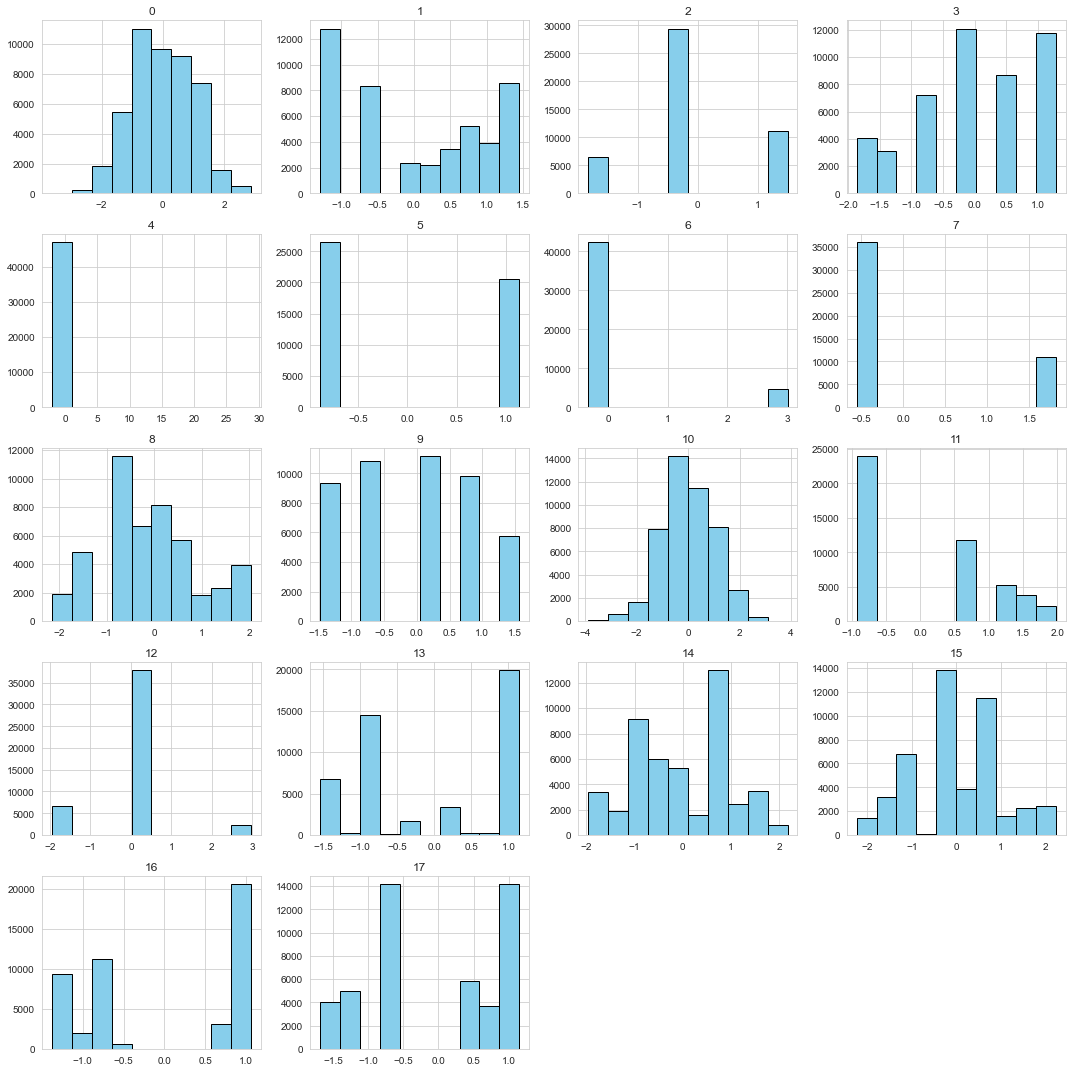

In [956]:
# histograms of the variables
#Histogram for the numerical attributes
X_train.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

Feature Selection

In [959]:
!pip install mlxtend  

In [960]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [961]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)


In [962]:
# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)


In [963]:
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   51.2s finished

[2021-10-19 11:53:29] Features: 1/10 -- score: 0.9095422106259873[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  1.3min finished

[2021-10-19 11:54:48] Features: 2/10 -- score: 0.919576453288775[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.5min finished

[2021-10-19 11:56:17] Features: 3/10 -- score: 0.9319329182237137[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [964]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
 

[0, 1, 2, 7, 9, 10, 12, 14, 15, 16]


In [966]:
headers = ["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
X_train.columns = headers
X_train.head()

age       job   marital  education   default   housing      loan  \
0 -1.056827  1.044633 -0.165449  -0.165700  0.465189 -0.881886 -0.332350   
1 -0.291297  1.326975 -0.165449   0.533168  0.465189 -0.881886 -0.332350   
2  0.554230  1.044633 -1.818724  -0.165700  0.465189 -0.881886 -0.332350   
3  0.302949  1.044633 -0.165449  -0.165700  0.465189 -0.881886 -0.332350   
4  0.473345 -1.288945 -1.818724   1.280669  0.465189  1.133933  3.008875   

    contact     month  day_of_week  duration  campaign  poutcome  \
0 -0.551564 -0.688069    -0.590883  1.148369  0.555681 -1.950234   
1 -0.551564  0.336713     0.908586  0.736673 -0.927857  0.169544   
2 -0.551564 -0.688069    -1.478309  1.387977  1.438368  0.169544   
3 -0.551564 -2.152757     0.195065  0.230011 -0.927857 -1.950234   
4 -0.551564  0.752862     0.195065 -1.090208  0.555681  0.169544   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0     -0.806385       -0.935071      -1.167065  -0.828319    -0.573760  
1     -1.317678       -1.431944       0.866441  -1.016189    -0.803543  
2     -0.806385       -0.935071      -1.167065  -0.859039    -0.573760  
3     -0.806385       -0.743555      -1.529121  -0.712155    -0.573760  
4      1.145778       -0.074880       0.823766   1.030693     1.151910

In [ ]:
headers = ["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
X_train.columns = headers
X_train.head()